In [51]:
library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

df <- read.csv('/home/workspace/pbmc_flow/data/FH PBMC flow data T cells -Absolute counts.csv')
df <- df[df$'Absolute.cell.uL' != '#VALUE!',]
df[['Absolute.cell.uL']] <- as.numeric(df[['Absolute.cell.uL']])

In [52]:
# colnames(df)
unique(df['Visit'])
# unique(df$Subject)
# class(df$Absolute.cell.uL)
# unique(df$population)

,Visit
,<chr>
1,Flu Year 1 Stand-Alone
55,Flu Year 1 Day 0
82,Flu Year 1 Day 7
244,Flu Year 1 Day 90
298,Flu Year 2 Stand-Alone
460,Flu Year 2 Day 0
595,Flu Year 2 Day 7
946,Flu Year 2 Day 90


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


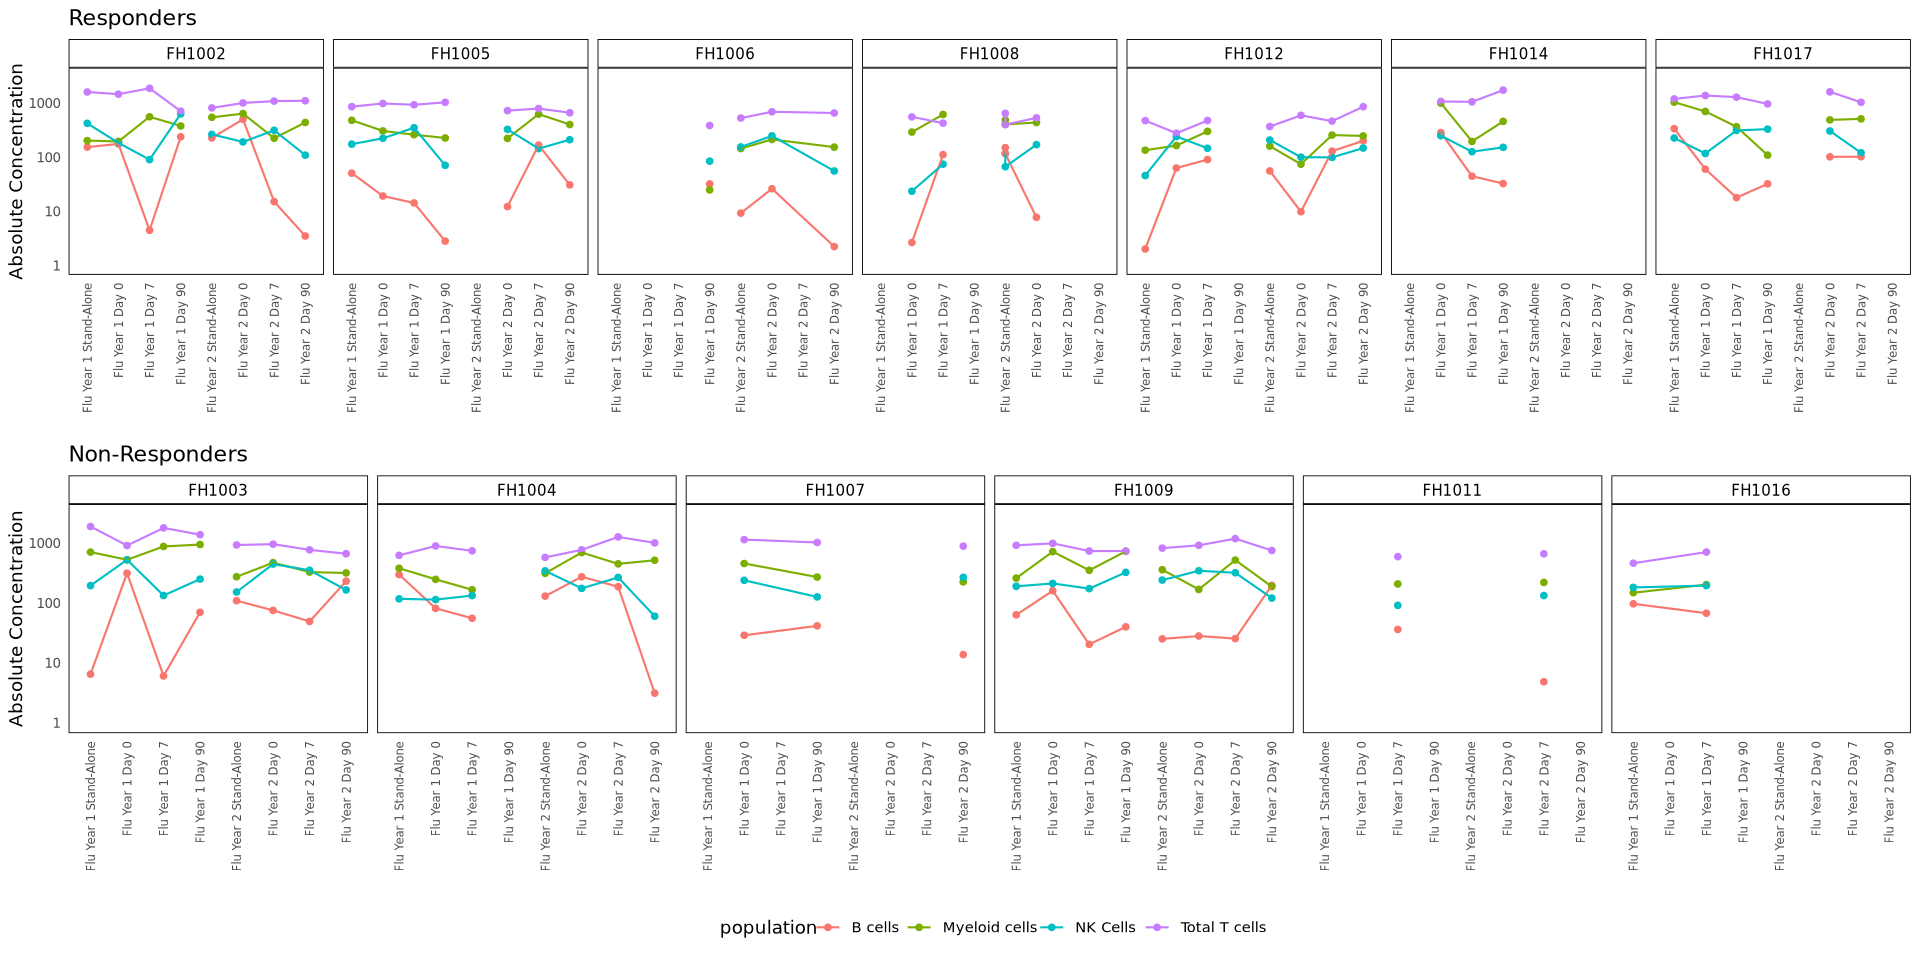

In [68]:
options(repr.plot.width = 16, repr.plot.height = 8)

df <- read.csv('/home/workspace/pbmc_flow/data/FH PBMC flow data T cells -Absolute counts.csv')
df <- df[df$'Absolute.cell.uL' != '#VALUE!',]
df[['Absolute.cell.uL']] <- as.numeric(df[['Absolute.cell.uL']])

timepoints <- c(
    'Flu Year 1 Stand-Alone',
    'Flu Year 1 Day 0',
    'Flu Year 1 Day 7',
    'Flu Year 1 Day 90',
    'Flu Year 2 Stand-Alone',
    'Flu Year 2 Day 0',
    'Flu Year 2 Day 7',
    'Flu Year 2 Day 90'
)

celltypes <- c(
    'B cells',
    'NK Cells', 
    'Total T cells',
    'Myeloid cells'
)

df <- df[df$Visit %in% timepoints, ]
df <- df[df$population %in% celltypes, ]
df$Visit <- factor(df$Visit, levels = timepoints)

# Remove any remaining invalid values
df <- df[!is.na(df$Absolute.cell.uL) & df$Absolute.cell.uL > 0, ]

# Create a year variable to group lines within years only
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")
df$group_var <- paste(df$population, df$Year, sep = "_")

# Separate plots for Responders and Non-Responders
responders <- df[df$Response == "Responder", ]
non_responders <- df[df$Response == "Non responder", ]

# Keep original subject ordering within each group
responders$Subject <- factor(responders$Subject)
non_responders$Subject <- factor(non_responders$Subject)

# Responders plot
p1 <- ggplot(responders, aes(x = Visit, y = Absolute.cell.uL, color = population, group = group_var)) +
      geom_point(size = 1.5) +
      geom_line(linewidth = 0.6) +
      scale_y_log10(
        limits = c(1, 3000),
        breaks = c(1, 10, 100, 1000),
        labels = c("1", "10", "100", "1000")
      ) +
      facet_wrap(~ Subject, nrow = 1, ncol = 7) +  # Force 7 columns
      theme_minimal() +
      theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 7),
        axis.text.y = element_text(size = 8),
        strip.text = element_text(size = 9, color = "black"),
        strip.background = element_rect(color = "black", fill = "white", linewidth = 0.5),
        legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", color = "black", linewidth = 0.5)
      ) +
      labs(title = "Responders", x = "", y = "Absolute Concentration")

# Non-Responders plot  
p2 <- ggplot(non_responders, aes(x = Visit, y = Absolute.cell.uL, color = population, group = group_var)) +
      geom_point(size = 1.5) +
      geom_line(linewidth = 0.6) +
      scale_y_log10(
        limits = c(1, 3000),
        breaks = c(1, 10, 100, 1000),
        labels = c("1", "10", "100", "1000")
      ) +
      facet_wrap(~ Subject, nrow = 1, ncol = 7) +  # Force 7 columns (6 subjects + 1 empty)
      theme_minimal() +
      theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 7),
        axis.text.y = element_text(size = 8),
        strip.text = element_text(size = 9, color = "black"),
        strip.background = element_rect(color = "black", fill = "white", linewidth = 0.5),
        legend.position = "bottom",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", color = "black", linewidth = 0.5)
      ) +
      labs(title = "Non-Responders", x = "", y = "Absolute Concentration") +
      guides(color = guide_legend(nrow = 1))

# Combine plots
plot_grid(p1, p2, ncol = 1, rel_heights = c(1, 1.2))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


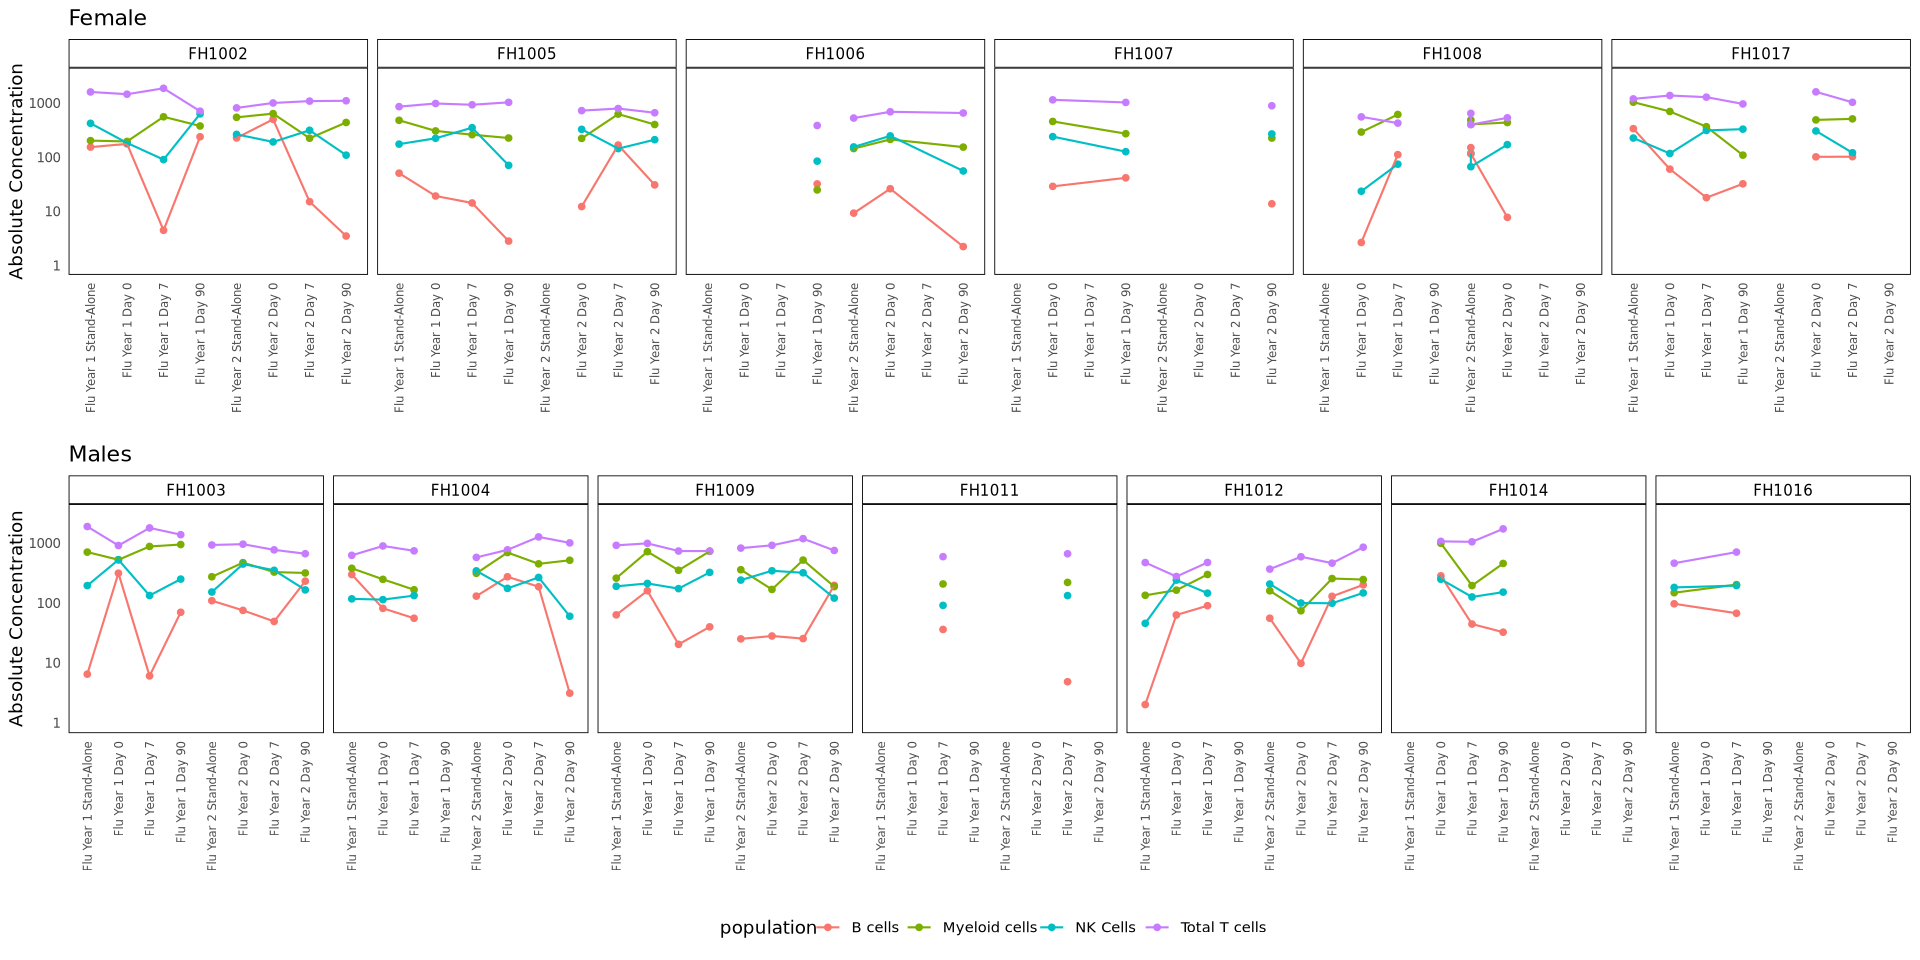

In [71]:
options(repr.plot.width = 16, repr.plot.height = 8)

df <- read.csv('/home/workspace/pbmc_flow/data/FH PBMC flow data T cells -Absolute counts.csv')
df <- df[df$'Absolute.cell.uL' != '#VALUE!',]
df[['Absolute.cell.uL']] <- as.numeric(df[['Absolute.cell.uL']])

timepoints <- c(
    'Flu Year 1 Stand-Alone',
    'Flu Year 1 Day 0',
    'Flu Year 1 Day 7',
    'Flu Year 1 Day 90',
    'Flu Year 2 Stand-Alone',
    'Flu Year 2 Day 0',
    'Flu Year 2 Day 7',
    'Flu Year 2 Day 90'
)

celltypes <- c(
    'B cells',
    'NK Cells', 
    'Total T cells',
    'Myeloid cells'
)

df <- df[df$Visit %in% timepoints, ]
df <- df[df$population %in% celltypes, ]
df$Visit <- factor(df$Visit, levels = timepoints)

# Remove any remaining invalid values
df <- df[!is.na(df$Absolute.cell.uL) & df$Absolute.cell.uL > 0, ]

# Create a year variable to group lines within years only
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")
df$group_var <- paste(df$population, df$Year, sep = "_")

# Separate plots for Responders and Non-Responders
responders <- df[df$Sex == "Female", ]
non_responders <- df[df$Sex == "Male", ]

# Keep original subject ordering within each group
responders$Subject <- factor(responders$Subject)
non_responders$Subject <- factor(non_responders$Subject)

# Responders plot
p1 <- ggplot(responders, aes(x = Visit, y = Absolute.cell.uL, color = population, group = group_var)) +
      geom_point(size = 1.5) +
      geom_line(linewidth = 0.6) +
      scale_y_log10(
        limits = c(1, 3000),
        breaks = c(1, 10, 100, 1000),
        labels = c("1", "10", "100", "1000")
      ) +
      facet_wrap(~ Subject, nrow = 1, ncol = 7) +  # Force 7 columns
      theme_minimal() +
      theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 7),
        axis.text.y = element_text(size = 8),
        strip.text = element_text(size = 9, color = "black"),
        strip.background = element_rect(color = "black", fill = "white", linewidth = 0.5),
        legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", color = "black", linewidth = 0.5)
      ) +
      labs(title = "Female", x = "", y = "Absolute Concentration")

# Non-Responders plot  
p2 <- ggplot(non_responders, aes(x = Visit, y = Absolute.cell.uL, color = population, group = group_var)) +
      geom_point(size = 1.5) +
      geom_line(linewidth = 0.6) +
      scale_y_log10(
        limits = c(1, 3000),
        breaks = c(1, 10, 100, 1000),
        labels = c("1", "10", "100", "1000")
      ) +
      facet_wrap(~ Subject, nrow = 1, ncol = 7) +  # Force 7 columns (6 subjects + 1 empty)
      theme_minimal() +
      theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 7),
        axis.text.y = element_text(size = 8),
        strip.text = element_text(size = 9, color = "black"),
        strip.background = element_rect(color = "black", fill = "white", linewidth = 0.5),
        legend.position = "bottom",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", color = "black", linewidth = 0.5)
      ) +
      labs(title = "Males", x = "", y = "Absolute Concentration") +
      guides(color = guide_legend(nrow = 1))

# Combine plots
plot_grid(p1, p2, ncol = 1, rel_heights = c(1, 1.2))